In [2]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

In [3]:
import numpy as np
import tensorflow as tf                              # tensorflow 기본 import
from tensorflow.keras.models import Sequential       # model box 구성
from tensorflow.keras.layers import Flatten, Dense, Input # model 안의 input layer와
                                                      # output layer를 구성
from tensorflow.keras.optimizers import Adam         # 알고리즘 담당
import sklearn
from sklearn.model_selection import train_test_split # train Data, Test Data 분리
from sklearn.preprocessing import MinMaxScaler       # 데이터 정규화
                                                      # 컴퓨터가 큰숫자를 작은숫자로 변경
                                                      # 0~1사이 실수 값으로 변경

In [4]:
import pandas as pd
df = pd.read_csv("../data/gpascore.csv")
df

,admit,gre,gpa,rank
0,0,380.0,3.21,3
1,1,660.0,3.67,3
2,1,800.0,4.00,1
3,1,640.0,3.19,4
4,0,520.0,2.33,4
...,...,...,...,...
421,1,750.0,3.44,4
422,1,710.0,3.66,4
423,0,450.0,3.25,4
424,1,760.0,3.76,2


In [5]:
df = df.dropna()
df.shape

(425, 4)

In [6]:
cols = df.keys()
cols

Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')

In [7]:
df.shape

(425, 4)

In [8]:
# 독립변수와 종속변수를 분리해야 해요.
x_data = df.drop('admit', axis=1, inplace=False)  # 2 차원 협태의 pixel(28 * 28)
y_data = df['admit']    # 1차원

In [9]:
x_data.shape

(425, 3)

In [10]:
y_data.shape

(425,)

In [11]:
# pixel data(x_data) 를 정규화(0~1사이의 실수값으로 변화)

scaler = MinMaxScaler()
scaler.fit(x_data)        # scaler를 학습시키고 - min, max
norm_x_data = scaler.transform(x_data)  # scaler 를 통해서 실제로 값을 변환(0 ~ 1 변경)

In [12]:
norm_x_data.shape

(425, 3)

norm_x_data=sklearn.utils.shuffle(norm_x_data)

In [13]:
norm_x_data

array([[0.27586207, 0.57978723, 0.66666667],
       [0.75862069, 0.82446809, 0.66666667],
       [1.        , 1.        , 0.        ],
       ...,
       [0.39655172, 0.60106383, 1.        ],
       [0.93103448, 0.87234043, 0.33333333],
       [0.84482759, 0.90425532, 0.66666667]])

In [14]:
model = Sequential()    # model 생성

model.add(Input(shape=(3,)))  # 모델 box에 input layer 추가
model.add(Dense(16, activation="relu")) 
model.add(Dense(8, activation="relu")) 
model.add(Dense(1, activation="sigmoid")) # 모델 box에 output layer 추가
                                                  # activation은 확률을 알아내기 위해 각 노드가 수행하는 수학적 연산.

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
# model이 어떻게 도작하는지를 지정
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="mse",
              metrics=["accuracy"]
             )

In [17]:
hist = model.fit(norm_x_data,
          y_data,
          epochs=1000,
          verbose=1,
          validation_split=0.2)

Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.4608 - loss: 0.2582 - val_accuracy: 0.5412 - val_loss: 0.2417
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4773 - loss: 0.2503 - val_accuracy: 0.5412 - val_loss: 0.2413
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4509 - loss: 0.2494 - val_accuracy: 0.5412 - val_loss: 0.2415
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4834 - loss: 0.2463 - val_accuracy: 0.5647 - val_loss: 0.2405
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5283 - loss: 0.2442 - val_accuracy: 0.6235 - val_loss: 0.2392
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5956 - loss: 0.2410 - val_accuracy: 0.6706 - val_loss: 0.2376
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6787 - loss: 0.2398 - val_accuracy: 0.6706 - val_loss: 0.2360
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6913 - loss: 0.2400 - val_accu

Epoch 58/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1535 - accuracy: 0.7853 - val_loss: 0.1533 - val_accuracy: 0.7647
Epoch 59/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.1508 - accuracy: 0.8000 - val_loss: 0.1485 - val_accuracy: 0.8353
Epoch 60/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.1509 - accuracy: 0.7971 - val_loss: 0.1495 - val_accuracy: 0.8235
Epoch 61/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.1511 - accuracy: 0.7941 - val_loss: 0.1471 - val_accuracy: 0.8118
Epoch 62/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.1497 - accuracy: 0.8118 - val_loss: 0.1512 - val_accuracy: 0.8118
Epoch 63/1000
11/11 [==============================] - 0s 26ms/step - loss: 0.1540 - accuracy: 0.8059 - val_loss: 0.1533 - val_accuracy: 0.7647
Epoch 64/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.1555 - accuracy: 0.8118 - val_loss: 0.1457 - val_accuracy: 

Epoch 115/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.1470 - accuracy: 0.8029 - val_loss: 0.1436 - val_accuracy: 0.8235
Epoch 116/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1472 - accuracy: 0.8000 - val_loss: 0.1461 - val_accuracy: 0.8118
Epoch 117/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1459 - accuracy: 0.7941 - val_loss: 0.1435 - val_accuracy: 0.8235
Epoch 118/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1477 - accuracy: 0.8118 - val_loss: 0.1436 - val_accuracy: 0.8118
Epoch 119/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1500 - accuracy: 0.8000 - val_loss: 0.1505 - val_accuracy: 0.8118
Epoch 120/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.1476 - accuracy: 0.8118 - val_loss: 0.1461 - val_accuracy: 0.8235
Epoch 121/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.1503 - accuracy: 0.7912 - val_loss: 0.1434 - val_accura

Epoch 172/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.1525 - accuracy: 0.7971 - val_loss: 0.1513 - val_accuracy: 0.8118
Epoch 173/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1467 - accuracy: 0.8088 - val_loss: 0.1472 - val_accuracy: 0.8235
Epoch 174/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1520 - accuracy: 0.7912 - val_loss: 0.1428 - val_accuracy: 0.8235
Epoch 175/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1484 - accuracy: 0.8029 - val_loss: 0.1552 - val_accuracy: 0.7882
Epoch 176/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1485 - accuracy: 0.8029 - val_loss: 0.1472 - val_accuracy: 0.8235
Epoch 177/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1571 - accuracy: 0.8088 - val_loss: 0.1627 - val_accuracy: 0.7529
Epoch 178/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1504 - accuracy: 0.7971 - val_loss: 0.1449 - val_accuracy

11/11 [==============================] - 0s 12ms/step - loss: 0.1490 - accuracy: 0.7971 - val_loss: 0.1423 - val_accuracy: 0.8000
Epoch 229/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.1465 - accuracy: 0.8059 - val_loss: 0.1427 - val_accuracy: 0.8235
Epoch 230/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.1465 - accuracy: 0.8029 - val_loss: 0.1424 - val_accuracy: 0.8235
Epoch 231/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.1458 - accuracy: 0.8029 - val_loss: 0.1423 - val_accuracy: 0.8235
Epoch 232/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.1482 - accuracy: 0.8088 - val_loss: 0.1434 - val_accuracy: 0.8118
Epoch 233/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.1462 - accuracy: 0.8088 - val_loss: 0.1432 - val_accuracy: 0.8118
Epoch 234/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.1488 - accuracy: 0.8118 - val_loss: 0.1462 - val_accuracy: 0.8000


11/11 [==============================] - 0s 12ms/step - loss: 0.1497 - accuracy: 0.8000 - val_loss: 0.1430 - val_accuracy: 0.8000
Epoch 285/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.1517 - accuracy: 0.8059 - val_loss: 0.1418 - val_accuracy: 0.8000
Epoch 286/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.1444 - accuracy: 0.8206 - val_loss: 0.1454 - val_accuracy: 0.8000
Epoch 287/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.1475 - accuracy: 0.8000 - val_loss: 0.1419 - val_accuracy: 0.8118
Epoch 288/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.1463 - accuracy: 0.8088 - val_loss: 0.1427 - val_accuracy: 0.8118
Epoch 289/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.1457 - accuracy: 0.8059 - val_loss: 0.1438 - val_accuracy: 0.8000
Epoch 290/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.1452 - accuracy: 0.8000 - val_loss: 0.1417 - val_accuracy: 0.8000


11/11 [==============================] - 0s 12ms/step - loss: 0.1521 - accuracy: 0.7971 - val_loss: 0.1426 - val_accuracy: 0.8235
Epoch 341/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.1533 - accuracy: 0.7882 - val_loss: 0.1452 - val_accuracy: 0.8000
Epoch 342/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.1439 - accuracy: 0.8118 - val_loss: 0.1412 - val_accuracy: 0.8118
Epoch 343/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.1450 - accuracy: 0.8118 - val_loss: 0.1475 - val_accuracy: 0.8000
Epoch 344/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.1461 - accuracy: 0.7853 - val_loss: 0.1412 - val_accuracy: 0.8118
Epoch 345/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.1477 - accuracy: 0.8029 - val_loss: 0.1447 - val_accuracy: 0.8000
Epoch 346/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.1457 - accuracy: 0.8118 - val_loss: 0.1412 - val_accuracy: 0.8000


Epoch 397/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.1447 - accuracy: 0.8176 - val_loss: 0.1430 - val_accuracy: 0.8000
Epoch 398/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.1451 - accuracy: 0.8000 - val_loss: 0.1404 - val_accuracy: 0.8000
Epoch 399/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.1462 - accuracy: 0.8059 - val_loss: 0.1452 - val_accuracy: 0.8000
Epoch 400/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.1481 - accuracy: 0.8059 - val_loss: 0.1418 - val_accuracy: 0.8118
Epoch 401/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.1464 - accuracy: 0.8147 - val_loss: 0.1409 - val_accuracy: 0.8118
Epoch 402/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1449 - accuracy: 0.8206 - val_loss: 0.1409 - val_accuracy: 0.8000
Epoch 403/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1473 - accuracy: 0.8118 - val_loss: 0.1404 - val_accu

11/11 [==============================] - 0s 13ms/step - loss: 0.1448 - accuracy: 0.8176 - val_loss: 0.1408 - val_accuracy: 0.8000
Epoch 454/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.1449 - accuracy: 0.8059 - val_loss: 0.1444 - val_accuracy: 0.8000
Epoch 455/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.1441 - accuracy: 0.8029 - val_loss: 0.1399 - val_accuracy: 0.8000
Epoch 456/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.1474 - accuracy: 0.8118 - val_loss: 0.1523 - val_accuracy: 0.8000
Epoch 457/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.1505 - accuracy: 0.7941 - val_loss: 0.1399 - val_accuracy: 0.8118
Epoch 458/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.1474 - accuracy: 0.8118 - val_loss: 0.1428 - val_accuracy: 0.8000
Epoch 459/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.1447 - accuracy: 0.8029 - val_loss: 0.1433 - val_accuracy: 0.8000


11/11 [==============================] - 0s 12ms/step - loss: 0.1473 - accuracy: 0.7971 - val_loss: 0.1415 - val_accuracy: 0.8000
Epoch 510/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.1445 - accuracy: 0.8176 - val_loss: 0.1400 - val_accuracy: 0.7882
Epoch 511/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.1448 - accuracy: 0.8000 - val_loss: 0.1406 - val_accuracy: 0.8000
Epoch 512/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.1462 - accuracy: 0.7971 - val_loss: 0.1410 - val_accuracy: 0.8000
Epoch 513/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.1450 - accuracy: 0.8118 - val_loss: 0.1401 - val_accuracy: 0.7882
Epoch 514/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.1446 - accuracy: 0.8088 - val_loss: 0.1429 - val_accuracy: 0.8000
Epoch 515/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.1439 - accuracy: 0.8206 - val_loss: 0.1401 - val_accuracy: 0.7882


11/11 [==============================] - 0s 15ms/step - loss: 0.1482 - accuracy: 0.8088 - val_loss: 0.1425 - val_accuracy: 0.8000
Epoch 566/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.1458 - accuracy: 0.8000 - val_loss: 0.1408 - val_accuracy: 0.8000
Epoch 567/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.1436 - accuracy: 0.8147 - val_loss: 0.1413 - val_accuracy: 0.8000
Epoch 568/1000
11/11 [==============================] - 0s 17ms/step - loss: 0.1458 - accuracy: 0.7971 - val_loss: 0.1400 - val_accuracy: 0.7882
Epoch 569/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.1496 - accuracy: 0.8059 - val_loss: 0.1430 - val_accuracy: 0.8000
Epoch 570/1000
11/11 [==============================] - 0s 17ms/step - loss: 0.1460 - accuracy: 0.8088 - val_loss: 0.1402 - val_accuracy: 0.8000
Epoch 571/1000
11/11 [==============================] - 0s 17ms/step - loss: 0.1454 - accuracy: 0.8118 - val_loss: 0.1401 - val_accuracy: 0.8000


11/11 [==============================] - 0s 13ms/step - loss: 0.1433 - accuracy: 0.8147 - val_loss: 0.1411 - val_accuracy: 0.8000
Epoch 622/1000
11/11 [==============================] - 0s 22ms/step - loss: 0.1432 - accuracy: 0.8235 - val_loss: 0.1399 - val_accuracy: 0.8000
Epoch 623/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.1437 - accuracy: 0.8147 - val_loss: 0.1406 - val_accuracy: 0.8000
Epoch 624/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.1448 - accuracy: 0.8059 - val_loss: 0.1396 - val_accuracy: 0.7882
Epoch 625/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.1456 - accuracy: 0.8029 - val_loss: 0.1402 - val_accuracy: 0.8000
Epoch 626/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.1439 - accuracy: 0.8118 - val_loss: 0.1412 - val_accuracy: 0.8000
Epoch 627/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.1436 - accuracy: 0.8059 - val_loss: 0.1406 - val_accuracy: 0.8000


11/11 [==============================] - 0s 11ms/step - loss: 0.1486 - accuracy: 0.8029 - val_loss: 0.1447 - val_accuracy: 0.8000
Epoch 678/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.1455 - accuracy: 0.8088 - val_loss: 0.1401 - val_accuracy: 0.8000
Epoch 679/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.1452 - accuracy: 0.8088 - val_loss: 0.1394 - val_accuracy: 0.8118
Epoch 680/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.1443 - accuracy: 0.8147 - val_loss: 0.1432 - val_accuracy: 0.8000
Epoch 681/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.1429 - accuracy: 0.8147 - val_loss: 0.1398 - val_accuracy: 0.7882
Epoch 682/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.1438 - accuracy: 0.8206 - val_loss: 0.1402 - val_accuracy: 0.8000
Epoch 683/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.1433 - accuracy: 0.8147 - val_loss: 0.1426 - val_accuracy: 0.7882


11/11 [==============================] - 0s 11ms/step - loss: 0.1427 - accuracy: 0.8147 - val_loss: 0.1411 - val_accuracy: 0.8000
Epoch 734/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.1428 - accuracy: 0.8206 - val_loss: 0.1408 - val_accuracy: 0.8000
Epoch 735/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.1438 - accuracy: 0.8147 - val_loss: 0.1405 - val_accuracy: 0.7882
Epoch 736/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.1432 - accuracy: 0.8118 - val_loss: 0.1410 - val_accuracy: 0.8000
Epoch 737/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1436 - accuracy: 0.8059 - val_loss: 0.1407 - val_accuracy: 0.8000
Epoch 738/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1427 - accuracy: 0.8147 - val_loss: 0.1417 - val_accuracy: 0.8000
Epoch 739/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.1457 - accuracy: 0.8059 - val_loss: 0.1400 - val_accuracy: 0.8000
Ep

Epoch 790/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1440 - accuracy: 0.8118 - val_loss: 0.1423 - val_accuracy: 0.8000
Epoch 791/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.1431 - accuracy: 0.8088 - val_loss: 0.1421 - val_accuracy: 0.8000
Epoch 792/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.1453 - accuracy: 0.8059 - val_loss: 0.1416 - val_accuracy: 0.8000
Epoch 793/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.1425 - accuracy: 0.8176 - val_loss: 0.1420 - val_accuracy: 0.8000
Epoch 794/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1431 - accuracy: 0.8147 - val_loss: 0.1417 - val_accuracy: 0.8000
Epoch 795/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1428 - accuracy: 0.8176 - val_loss: 0.1421 - val_accuracy: 0.8000
Epoch 796/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1425 - accuracy: 0.8235 - val_loss: 0.1429 - val_accurac

11/11 [==============================] - 0s 8ms/step - loss: 0.1426 - accuracy: 0.8206 - val_loss: 0.1411 - val_accuracy: 0.7882
Epoch 847/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1436 - accuracy: 0.8147 - val_loss: 0.1424 - val_accuracy: 0.8000
Epoch 848/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.1434 - accuracy: 0.8088 - val_loss: 0.1409 - val_accuracy: 0.8000
Epoch 849/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.1426 - accuracy: 0.8147 - val_loss: 0.1430 - val_accuracy: 0.8000
Epoch 850/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.1430 - accuracy: 0.8118 - val_loss: 0.1417 - val_accuracy: 0.7882
Epoch 851/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.1428 - accuracy: 0.8147 - val_loss: 0.1417 - val_accuracy: 0.7882
Epoch 852/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1431 - accuracy: 0.8147 - val_loss: 0.1444 - val_accuracy: 0.7882
Epoch 

Epoch 903/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.1425 - accuracy: 0.8147 - val_loss: 0.1427 - val_accuracy: 0.8000
Epoch 904/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1418 - accuracy: 0.8147 - val_loss: 0.1425 - val_accuracy: 0.8000
Epoch 905/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1436 - accuracy: 0.8118 - val_loss: 0.1421 - val_accuracy: 0.7882
Epoch 906/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.1421 - accuracy: 0.8206 - val_loss: 0.1436 - val_accuracy: 0.8000
Epoch 907/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1438 - accuracy: 0.8176 - val_loss: 0.1452 - val_accuracy: 0.7882
Epoch 908/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.1426 - accuracy: 0.8118 - val_loss: 0.1405 - val_accuracy: 0.8235
Epoch 909/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.1436 - accuracy: 0.8000 - val_loss: 0.1450 - val_accuracy:

Epoch 960/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.1424 - accuracy: 0.8176 - val_loss: 0.1422 - val_accuracy: 0.7882
Epoch 961/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1417 - accuracy: 0.8147 - val_loss: 0.1463 - val_accuracy: 0.7882
Epoch 962/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1444 - accuracy: 0.8147 - val_loss: 0.1422 - val_accuracy: 0.8000
Epoch 963/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.1417 - accuracy: 0.8235 - val_loss: 0.1447 - val_accuracy: 0.8000
Epoch 964/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1418 - accuracy: 0.8235 - val_loss: 0.1428 - val_accuracy: 0.7882
Epoch 965/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.1417 - accuracy: 0.8176 - val_loss: 0.1443 - val_accuracy: 0.8000
Epoch 966/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.1416 - accuracy: 0.8206 - val_loss: 0.1426 - val_accuracy

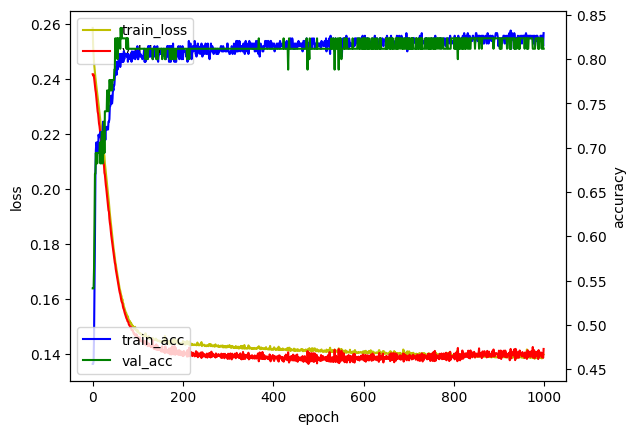

In [18]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")